# 4.10.1 Coding Etiquette & Excel Reporting

## This script includes the following points:

#### 1. Import libraries and data
#### 2. Address security implications
#### 3. Create a regional segmentation of the data
#### 4. Create an exclusion flag to exclude low-activity customers
#### 5. Create profiling variables
#### 6. Visualizations to show distributions of profiles

### 1. Import libraries and data

In [5]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Set the Path
path = r'/Users/test/Desktop/Data Analysis/11-2024 Instacart Basket Analysis'

In [7]:
# Import the latest dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

### 2. Address security implications

In [55]:
# Drop the PII column 'first_name' and 'surname' 

# already did  df = df.drop(['first_name', 'surname'], axis=1)

In [59]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,customer_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest


### 3. Create a regional segmentation of the data

#### 3.1 Create a region colunm

In [63]:
# Create an empty list to store the region results
result = []

# Create the conditions (which state belongs to which region)
for state in df["state"]:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 
                 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
                 'New Jersey']:
        result.append("Northeast")
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
                   'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
                   'Minnesota', 'Iowa', 'Missouri']:
        result.append("Midwest")
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 
                   'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 
                   'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append("South")
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 
                   'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 
                   'California', 'Hawaii']:
        result.append("West")
    else:
        result.append("Unknown")

In [65]:
# Assign the values in result[] to new column 'region'
df['region']=result

In [67]:
# Check the value counts
df['region'].value_counts()

region
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

#### 3.2 Compare the spending habits between U.S. regions

In [70]:
# Create a crosstab
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [72]:
crosstab.to_clipboard()

In [74]:
# Print the crosstab
print(crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest               29265      7566800
Northeast             18639      5703253
South                 40577     10749519
West                  31238      8260441


The South has the largest group of high spenders, while the Northeast has the fewest. Similarly, the South also leads in the number of low spenders, likely due to its larger population relative to other regions.

This trend suggests that the number of high and low spenders in each region is proportional to its population size, with regions having larger populations naturally accounting for more spenders overall.

In [77]:
# save changes to dataframe
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged.pkl'))

### 4. Create an exclusion flag to exclude low-activity customers 

In [80]:
# Create a flag for customers with less than 5 orders
df.loc[df['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [82]:
# Check the value counts
df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30959687
low-activity customer      1440045
Name: count, dtype: int64

In [84]:
# Exclude low-activity customers from the dataframe
df_excluded = df[df['activity_flag'] != 'low-activity customer']

In [86]:
# Check the shape
df.shape

(32399732, 33)

In [88]:
df_excluded.shape

(30959687, 33)

In [92]:
# Check the new columns
df_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high-activity customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high-activity customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,high-activity customer
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,high-activity customer
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,high-activity customer


In [94]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

### 5 & 6. Create profiling variables and appropriate visualizations to show the distribution of profiles.

#### 1). Age

In [98]:
# Overview the age range
df_excluded['age'].describe()

count    3.095969e+07
mean     4.946803e+01
std      1.848527e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

We group the customers by age. (Young adult <=29, Adult 30-44，Middle-aged adult 45-59, Older adult 60+.)

In [101]:
# Create age profiling variable
df_excluded.loc[df_excluded['age'] <= 29, 'age_group'] = 'Young adult'
df_excluded.loc[(df_excluded['age'] > 29) & (df_excluded['age'] <= 44), 'age_group'] = 'Adult'
df_excluded.loc[(df_excluded['age'] > 44) & (df_excluded['age'] <= 59), 'age_group'] = 'Middle-aged adult'
df_excluded.loc[df_excluded['age'] > 59, 'age_group'] = 'Older adult'

/var/folders/23/dwh_pxj57x19sw0ns77c_swh0000gn/T/ipykernel_18645/1648912794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['age'] <= 29, 'age_group'] = 'Young adult'


In [103]:
# Check value counts for each age group
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
Older adult          10572857
Middle-aged adult     7309871
Adult                 7260327
Young adult           5816632
Name: count, dtype: int64

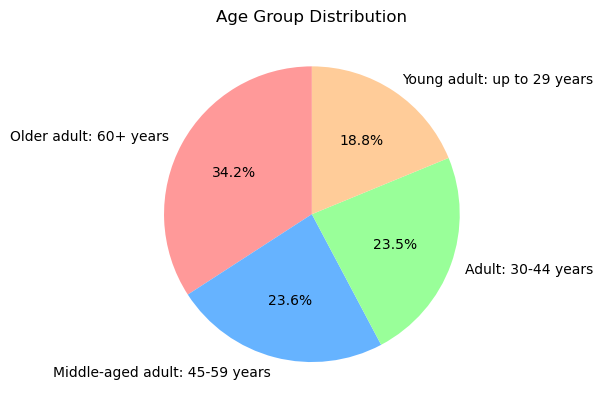

In [105]:
# Plot a pie chart for age_group distribution
pie_age_group = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['Older adult: 60+ years', 'Middle-aged adult: 45-59 years', 'Adult: 30-44 years', 'Young adult: up to 29 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Age Group Distribution')
plt.ylabel('')
plt.show()

In [107]:
# Export chart
pie_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_age_group.png'))

#### 2). Income

In [110]:
# Overview the income range
df_excluded['income'].describe()

count    3.095969e+07
mean     9.965502e+04
std      4.309143e+04
min      2.590300e+04
25%      6.728600e+04
50%      9.676100e+04
75%      1.280810e+05
max      5.939010e+05
Name: income, dtype: float64

In [112]:
# Create income_group column based on the 25th and 75th percentiles
df_excluded.loc[df_excluded['income'] < 67286, 'income_group'] = 'Low income'
df_excluded.loc[(df_excluded['income'] >= 67286) & (df_excluded['income'] <= 128081), 'income_group'] = 'Medium income'
df_excluded.loc[df_excluded['income'] > 128081, 'income_group'] = 'High income'

/var/folders/23/dwh_pxj57x19sw0ns77c_swh0000gn/T/ipykernel_18645/2006960026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['income'] < 67286, 'income_group'] = 'Low income'


In [114]:
# Check the counts of income groups
df_excluded['income_group'].value_counts(dropna = False)

income_group
Medium income    15480080
High income       7739805
Low income        7739802
Name: count, dtype: int64

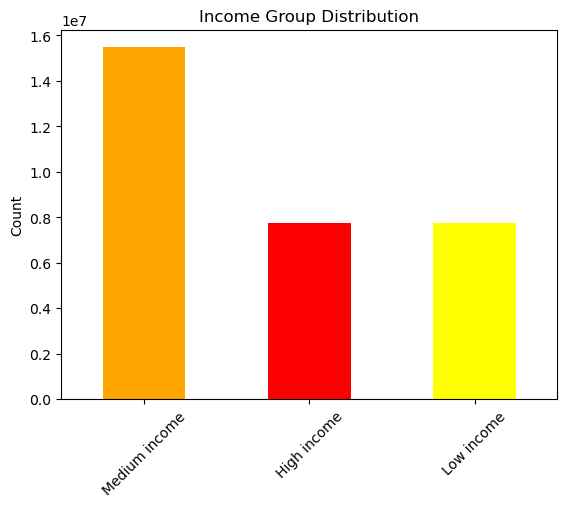

In [116]:
# Plot a bar chart for income groups
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
bar_income_group = income_group_counts.plot.bar(color = ['orange','red','yellow']) 
plt.title('Income Group Distribution')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

Medium income group is the biggest group of customers in the database.

In [119]:
# Export the bar chart
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))

#### 3). Dependents

In [122]:
# Create a dependent_flag column
df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['n_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

/var/folders/23/dwh_pxj57x19sw0ns77c_swh0000gn/T/ipykernel_18645/3417870648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [124]:
# Check value counts
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    23221179
no dependants      7738508
Name: count, dtype: int64

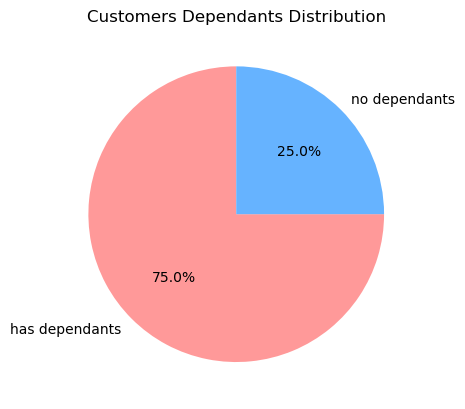

In [126]:
# Create a pie chart showing the percentage of dependants
pie_dependents = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Customers Dependants Distribution')
plt.ylabel('')
plt.show()

In [128]:
# Export the Pie Chart
pie_dependents.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'pie_dependents.png'))

In [130]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

#### 4). Spending by Age Group

In [133]:
# Crosstab spending with age group
age_spending_cross = pd.crosstab(df_excluded['age_group'], df_excluded['spending_flag'], dropna = False)
age_spending_cross

spending_flag,High spender,Low spender
age_group,,
Adult,23261,7237066
Middle-aged adult,24337,7285534
Older adult,33655,10539202
Young adult,16183,5800449


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Adult'),
  Text(1, 0, 'Middle-aged adult'),
  Text(2, 0, 'Older adult'),
  Text(3, 0, 'Young adult')])

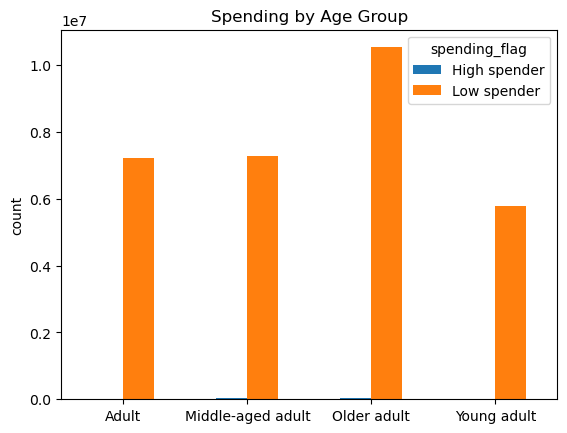

In [135]:
# bar chart
bar_age_spending = age_spending_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

The low spender for each age group is hard to see. Therefore, I would create two bar charts seperately.

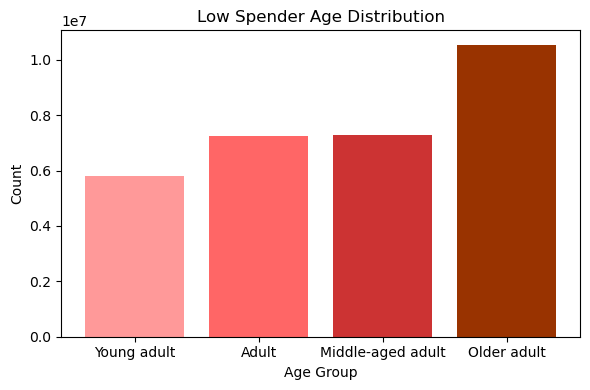

In [138]:
# Basic chart design
age_groups = ['Young adult', 'Adult', 'Middle-aged adult', 'Older adult']
low_spender_values = [5800449, 7237066, 7285534, 10539202]  
high_spender_values = [16183, 23261, 24337, 33655]  
colors = ['#ff9999', '#ff6666', '#cc3333', '#993300'] 

# Create a bar chart for Low spender
plt.figure(figsize=(6,4))  
plt.bar(age_groups, low_spender_values, color=colors)  
plt.title('Low Spender Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
# Export the chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_low_spending_age.png'), format='png', dpi=200) 
plt.show()

In [140]:
plt.close()

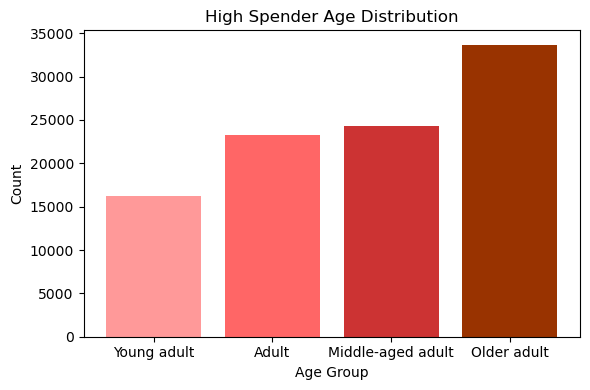

In [142]:
# Create a bar chart for High spender
plt.figure(figsize=(6, 4))  
plt.bar(age_groups, high_spender_values, color=colors)  
plt.title('High Spender Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
# Export the chart and close
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_high_spending_age.png'), format='png', dpi=200) 
plt.show()

In [144]:
plt.close()

#### 5).Loyalty by Age Group

In [147]:
# Crosstab loyalty with age group
loyalty_age_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna=False)
loyalty_age_cross

age_group,Adult,Middle-aged adult,Older adult,Young adult
loyalty_flag,,,,
Loyal customer,2415098,2440442,3514296,1912927
New customer,1119739,1133117,1649663,900277
Regular customer,3725490,3736312,5408898,3003428


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

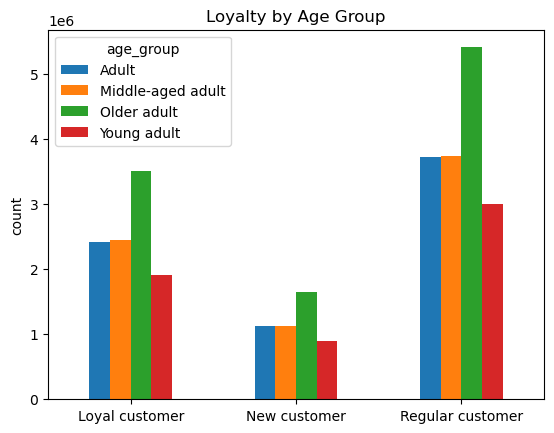

In [149]:
# bar chart
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [151]:
# Export the bar chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_age.png'))